In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='Count'>

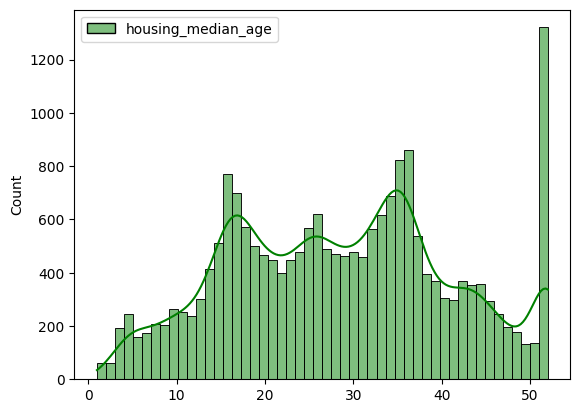

In [ ]:
sns.histplot([df['housing_median_age']],bins = 50, kde=True, alpha= 0.5, palette =["green"])

<Axes: ylabel='Count'>

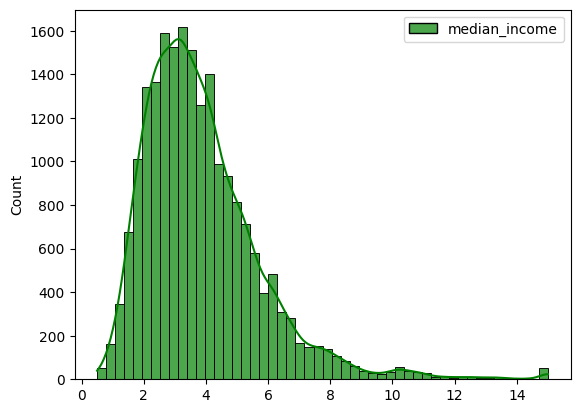

In [ ]:
sns.histplot([df['median_income']],bins = 50, kde=True, alpha= 0.7, palette =["green"])

<Axes: >

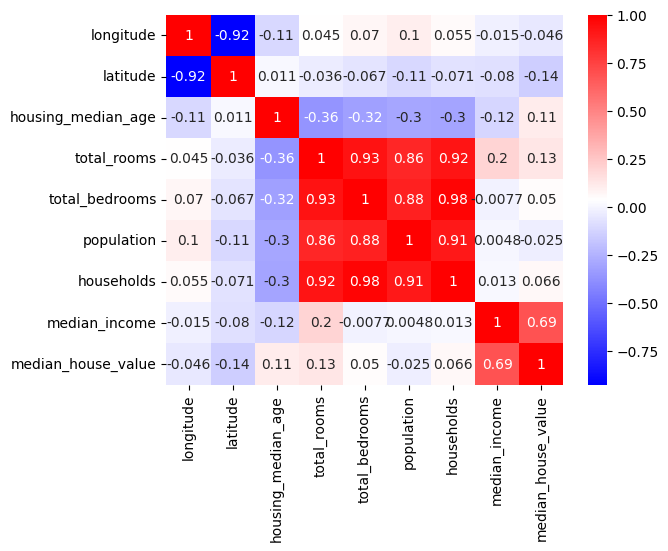

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
k = numeric_df.corr()
sns.heatmap(k, annot=True, cmap='bwr')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
data= pd.read_csv("housing.csv")

In [ ]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
print(data.shape)

(20640, 10)


In [ ]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
labelencoder = LabelEncoder()
data["ocean_proximity_encoded"] = labelencoder.fit_transform(data['ocean_proximity'])
count_encoded = data['ocean_proximity_encoded'].value_counts()
print(count_encoded)

ocean_proximity_encoded
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data[data_numeric.columns] = data_numeric.fillna(data_numeric.mean())


In [ ]:
data.isnull().any()

,0
longitude,False
latitude,False
housing_median_age,False
total_rooms,False
total_bedrooms,False
population,False
households,False
median_income,False
median_house_value,False
ocean_proximity,False


In [ ]:
data_cleaned = data.drop('ocean_proximity', axis=1, )

In [ ]:
X = data_cleaned.drop('median_house_value', axis=1)
y = data_cleaned['median_house_value']

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
X = data_scaler.fit_transform(X)
print(X)

[[-1.32783522  1.05254828  0.98214266 ... -0.97703285  2.34476576
   1.2910888 ]
 [-1.32284391  1.04318455 -0.60701891 ...  1.66996103  2.33223796
   1.2910888 ]
 [-1.33282653  1.03850269  1.85618152 ... -0.84363692  1.7826994
   1.2910888 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.17404163 -1.14259331
  -0.11673923]
 [-0.87362627  1.77823747 -0.84539315 ... -0.39375258 -1.05458292
  -0.11673923]
 [-0.83369581  1.75014627 -1.00430931 ...  0.07967221 -0.78012947
  -0.11673923]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print('train set size =', X_train.shape)
print('test set size =',X_test.shape )

train set size = (18576, 9)
test set size = (2064, 9)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model.predict(X_train)

In [ ]:
mse_train_before = root_mean_squared_error(y_train, y_train_pred)
r2_train_before = r2_score(y_train, y_train_pred)
print('Root Mean Squared Error(RMSE) on Training data: ', mse_train_before)
print("R-squared(R^2) on Training data: ", r2_train_before)

Root Mean Squared Error(RMSE) on Training data:  69270.86260372588
R-squared(R^2) on Training data:  0.6395722239325685


In [ ]:
y_test_pred = lr_model.predict(X_test)

In [ ]:
mse_test_before = root_mean_squared_error(y_test, y_test_pred)
r2_test_before = r2_score(y_test, y_test_pred)
print('Root Mean Squared Error(RMSE) on Test data: ', mse_test_before)
print("R-squared(R^2) on Test data: ", r2_test_before)

Root Mean Squared Error(RMSE) on Test data:  73644.83116083719
R-squared(R^2) on Test data:  0.5933171038803811


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree =2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [ ]:
print('X_poly_shape', X_poly.shape)

X_poly_shape (20640, 55)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

In [ ]:
print('Train set shape', X_train.shape)
print('Test set shape', X_test.shape)

Train set shape (18576, 55)
Test set shape (2064, 55)


In [ ]:
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model_poly.predict(X_train)

mse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Root Mean Squared Error(RMSE) of Training Data', mse_train)
print("R-squared(R^2) of Training Data", r2_train)

Root Mean Squared Error(RMSE) of Training Data 62570.267759558476
R-squared(R^2) of Training Data 0.7059283979329849


In [ ]:
y_test_pred = lr_model_poly.predict(X_test)


mse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test= r2_score(y_test, y_test_pred)
print('Root Mean Squared Error(RMSE) on Test data: ', mse_test)
print("R-squared(R^2) on Test data: ", r2_test)

Root Mean Squared Error(RMSE) on Test data:  73417.57035216627
R-squared(R^2) on Test data:  0.5958231990958169


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data_cleaned.drop("median_house_value", axis =1)
y = data_cleaned["median_house_value"]

In [ ]:
data_scaler = StandardScaler()
X = data_scaler.fit_transform(X)
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.15719994, -1.70225453,  1.8547863 ,  1.70382331,  0.70467378,
         0.14044674],
       [ 2.87263151, -2.3047156 ,  1.9782144 ,  1.45640433,  0.22588098,
        -0.38227627],
       [-2.03519184, -1.79186986,  0.9709968 ,  1.89443788,  1.26251199,
         0.04699636],
       ...,
       [-0.45515873, -1.6384034 , -0.31193923, -1.51947927, -0.81951544,
        -0.24827694],
       [-0.86707319, -1.61941222, -0.20800024, -1.4886554 , -0.79020992,
        -0.28420985],
       [ 0.13316801, -1.6848017 , -0.05224996, -1.36842899, -0.68749535,
        -0.17045861]])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [ ]:
print("train set size: ", X_train.shape)
print("test set size",X_test.shape)

train set size:  (18576, 6)
test set size (2064, 6)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model.predict(X_train)

In [ ]:
mse_train_after = root_mean_squared_error(y_train, y_train_pred)
r2_train_after = r2_score(y_train, y_train_pred)
print('Root Mean Squared Error(RMSE) on Training data: ', mse_train_after)
print("R-squared(R^2) on Training data: ", r2_train_after)

Root Mean Squared Error(RMSE) on Training data:  77932.92939609048
R-squared(R^2) on Training data:  0.5437960273715787


In [ ]:
y_test_pred = lr_model.predict(X_test)

In [ ]:
mse_test_after = root_mean_squared_error(y_test, y_test_pred)
r2_test_after= r2_score(y_test, y_test_pred)
print('Root Mean Squared Error(RMSE) on Test data: ', mse_test_after)
print("R-squared(R^2) on Test data: ", r2_test_after)

Root Mean Squared Error(RMSE) on Test data:  80440.55709969568
R-squared(R^2) on Test data:  0.5147992032551064


In [ ]:
print("BEFORE FEATURE EXTRACTION")
print('Root Mean Squared Error(RMSE) on Train data: ', mse_train_before)
print("R-squared(R^2) on Train data: ", r2_train_before)
print('Root Mean Squared Error(RMSE) on Test data: ', mse_test_before)
print("R-squared(R^2) on Test data: ", r2_test_before)

print("----------------------------------------------------------------------------------------------")

print("AFTER FEATURE EXTRACTION")
print('Root Mean Squared Error(RMSE) on Train data: ', mse_train_after)
print("R-squared(R^2) on Train data: ", r2_train_after)
print('Root Mean Squared Error(RMSE) on Test data: ', mse_test_after)
print("R-squared(R^2) on Test data: ", r2_test_after)


BEFORE FEATURE EXTRACTION
Root Mean Squared Error(RMSE) on Train data:  69270.86260372588
R-squared(R^2) on Train data:  0.6395722239325685
Root Mean Squared Error(RMSE) on Test data:  73644.83116083719
R-squared(R^2) on Test data:  0.5933171038803811
----------------------------------------------------------------------------------------------
AFTER FEATURE EXTRACTION
Root Mean Squared Error(RMSE) on Train data:  77932.92939609048
R-squared(R^2) on Train data:  0.5437960273715787
Root Mean Squared Error(RMSE) on Test data:  80440.55709969568
R-squared(R^2) on Test data:  0.5147992032551064
